In [0]:
import pandas as pd
import numpy as np
confirmed_raw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
death_raw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
census_raw = pd.read_csv('https://raw.githubusercontent.com/GabrielBG010/Covid-County-Clustering/master/census_usa.csv')

confirmed_raw = confirmed_raw.set_index('FIPS')
death_raw = death_raw.set_index('FIPS')
census_raw = census_raw.set_index('fips')

In [0]:
death = death_raw.drop(death_raw.columns[[0,1,2,3,5,6,7,8,9,10,11]], axis = 1 )

mean_death = death.T.mean()

confirmed = confirmed_raw.drop(confirmed_raw.columns[[0,1,2,3,5,6,7,8,9,10,11]], axis = 1 )

mean_confirmed = confirmed.T.mean()

In [0]:
census = census_raw.reset_index().dropna().set_index('fips')

In [0]:
death.reset_index().dropna()

In [0]:
death = death_raw.drop(death_raw.columns[[0,1,2,3,4,5,6,7,8,9,10]], axis = 1 )
death = death.reset_index().dropna()
death = death.astype({'FIPS': 'int32'})
death = death.set_index('FIPS')
# d3 =  pd.DataFrame(death.T.diff().rolling(3).mean().mean(),columns=['d3'])
d7 =  pd.DataFrame(death.T.diff().rolling(7).mean().mean(),columns=['death_rate'])
# d14 = pd.DataFrame(death.T.diff().rolling(14).mean().mean(),columns=['d14'])

In [0]:
confirmed = confirmed_raw.drop(confirmed_raw.columns[[0,1,2,3,4,5,6,7,8,9,10]], axis = 1 )
confirmed = confirmed.reset_index().dropna()
confirmed = confirmed.astype({'FIPS': 'int32'})
confirmed = confirmed.set_index('FIPS')
# c3 =  pd.DataFrame(confirmed.T.diff().rolling(3).mean().mean(),columns=['c3'])
c7 =  pd.DataFrame(confirmed.T.diff().rolling(7).mean().mean(),columns=['number_of_cases'])
# c14 = pd.DataFrame(confirmed.T.diff().rolling(14).mean().mean(),columns=['c14'])

In [0]:
df = census.join(c7).join(d7).drop(columns=['name_x'])

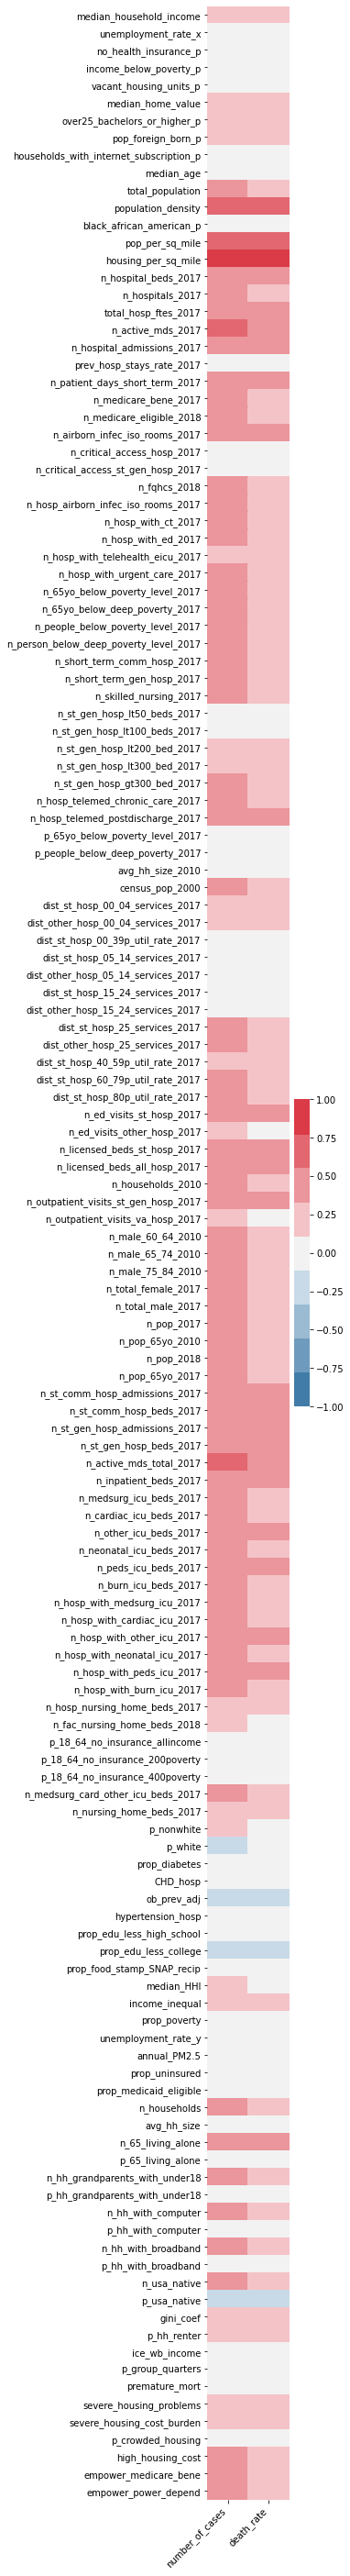

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

fig, ax = plt.subplots(figsize=(2,50))

ax = sns.heatmap(
    corr.iloc[:-2,-2:], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(240, 10, n=9),
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [0]:
df

In [41]:
corr_matrix= corr.iloc[:-2,-2:]
threshold = 0.4
corr_matrix = corr_matrix[abs(corr_matrix.number_of_cases)>=threshold]
corr_matrix = corr_matrix[abs(corr_matrix.death_rate)>=threshold]
corr_matrix

,number_of_cases,death_rate
population_density,0.726354,0.747219
pop_per_sq_mile,0.731676,0.753035
housing_per_sq_mile,0.788976,0.825619
total_hosp_ftes_2017,0.518371,0.437877
n_active_mds_2017,0.589515,0.455196
n_active_mds_total_2017,0.586218,0.452022


In [0]:
df2 = df.loc[:,corr_matrix.index.values]


In [0]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

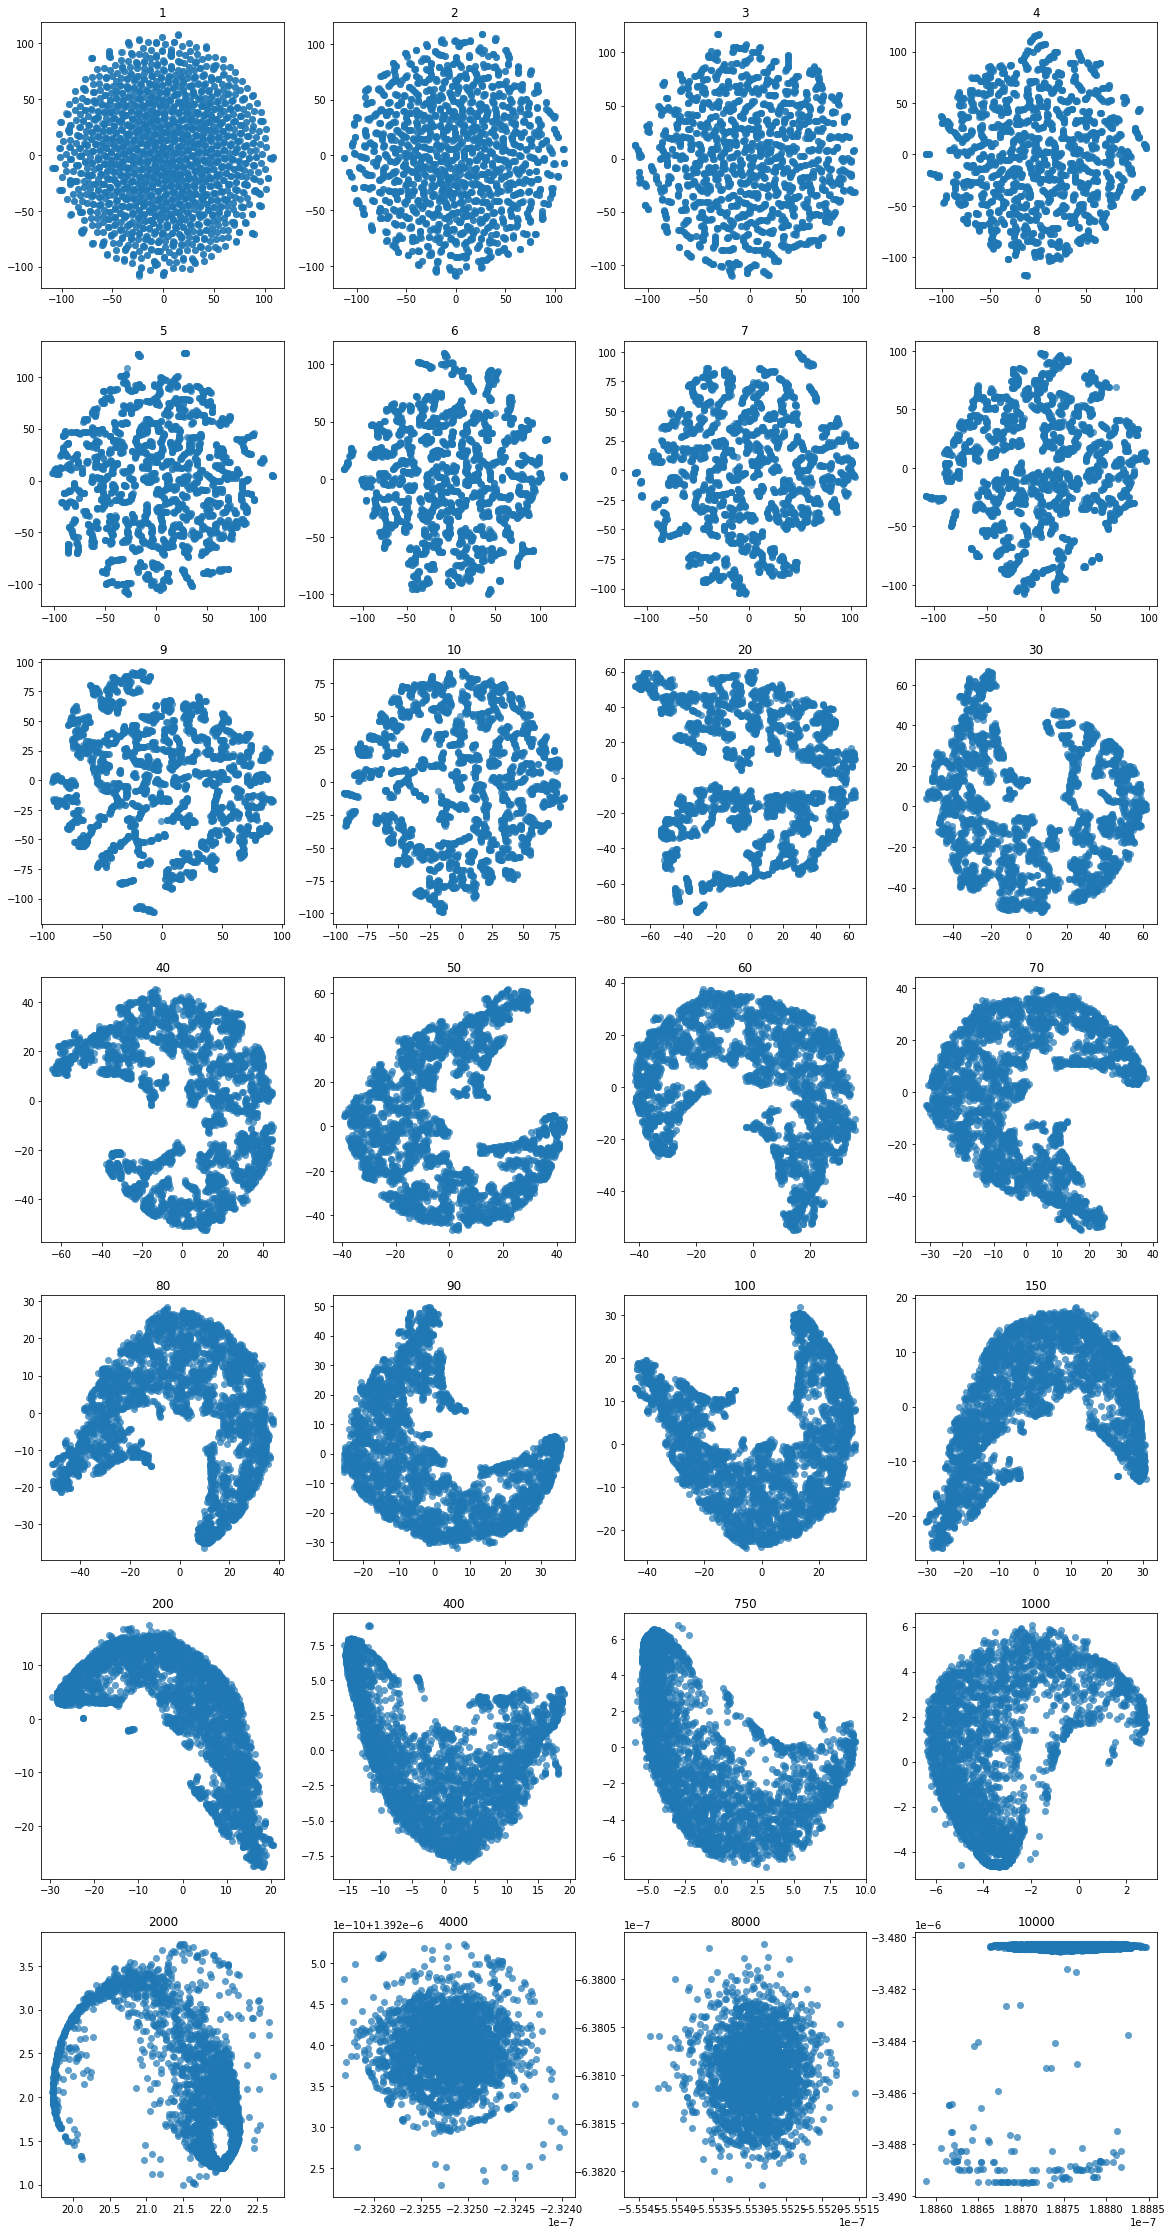

In [88]:
colnames = df.columns
df2 = pd.DataFrame(StandardScaler().fit_transform(df), columns=colnames).fillna(0)

df2 = df2.loc[:,corr_matrix.index.values]
#filter

perp_list = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,150,200,400,750,1000,2000,4000,8000,10000]

fig, axs =  plt.subplots(7, 4,figsize=(20,40))
axes = axs.ravel()

# plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=200, lw=0, alpha=0.7, edgecolor='k',c=label)

for i,p in enumerate(perp_list):
  X_pca = TSNE(n_components=2,perplexity=p).fit_transform(df2)
  axes[i].scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=200, lw=0, alpha=0.7, edgecolor='k')
  axes[i].set_title(str(p))
plt.show()

In [0]:
# clustering = DBSCAN(eps=10, min_samples=2).fit(X_pca)
# label = clustering.labels_  
# plot_by_label(X_pca,label,show=15,title='All the states')